# Massey Ordinals

Sources: [Kaggle Notebook](https://www.kaggle.com/joseleiva/massey-s-ordinal-s-ordinals),
         [Medium Article](https://towardsdatascience.com/machine-learning-madness-predicting-every-ncaa-tournament-matchup-7d9ce7d5fc6d)

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
plt.rcParams['figure.figsize'] = (15, 9)

In [144]:
season_df = pd.read_csv('Data/Stage2DataFiles/RegularSeasonCompactResults.csv')
tourney_df = pd.read_csv('Data/Stage2DataFiles/NCAATourneyCompactResults.csv')
ordinals_df = pd.read_csv('Data/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv')\
                .rename(columns={'RankingDayNum':'DayNum'})
# Get the last available data from each system previous to the tournament
ordinals_df = ordinals_df.groupby(['SystemName','Season','TeamID']).last().reset_index()
ordinals_df.head()

,SystemName,Season,TeamID,DayNum,OrdinalRank
0,7OT,2012,1102,133,146
1,7OT,2012,1103,133,80
2,7OT,2012,1104,133,35
3,7OT,2012,1105,133,338
4,7OT,2012,1106,133,300


In [150]:
(ordinals_df[ordinals_df['Season'] == 2018])['DayNum'].value_counts()

133    21992
128      991
79         8
114        8
100        6
107        6
37         6
121        5
30         5
72         4
86         4
65         3
16         3
58         3
44         3
93         1
23         1
Name: DayNum, dtype: int64

In [139]:
# Add winner's ordinals
games_df = tourney_df.merge(ordinals_df,left_on=['Season','WTeamID'],
                          right_on=['Season','TeamID'])
games_df.head()
# Then add losser's ordinals
games_df = games_df.merge(ordinals_df,left_on=['Season','LTeamID','SystemName'],
                          right_on=['Season','TeamID','SystemName'],
                          suffixes = ['W','L'])
games_df.head()

,Season,DayNum_x,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SystemName,TeamIDW,DayNum_y,OrdinalRankW,TeamIDL,DayNum,OrdinalRankL
0,2003,134,1421,92,1411,84,N,1,ARG,1421,133,255,1411,133,230
1,2003,134,1421,92,1411,84,N,1,BIH,1421,133,247,1411,133,234
2,2003,134,1421,92,1411,84,N,1,BOB,1421,133,236,1411,133,239
3,2003,134,1421,92,1411,84,N,1,BRZ,1421,133,234,1411,133,218
4,2003,134,1421,92,1411,84,N,1,COL,1421,133,213,1411,133,212


In [141]:
games_df.head(20)

,Season,DayNum_x,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,SystemName,DayNum_y,OrdinalRankW,DayNum,OrdinalRankL,prediction
0,2003,134,1421,92,1411,84,N,1,ARG,133,255,133,230,0
1,2003,134,1421,92,1411,84,N,1,BIH,133,247,133,234,0
2,2003,134,1421,92,1411,84,N,1,BOB,133,236,133,239,1
3,2003,134,1421,92,1411,84,N,1,BRZ,133,234,133,218,0
4,2003,134,1421,92,1411,84,N,1,COL,133,213,133,212,0
5,2003,134,1421,92,1411,84,N,1,DOL,133,258,133,239,0
6,2003,134,1421,92,1411,84,N,1,DUN,133,241,133,247,1
7,2003,134,1421,92,1411,84,N,1,DWH,133,220,133,242,1
8,2003,134,1421,92,1411,84,N,1,ECK,133,184,133,213,1
9,2003,134,1421,92,1411,84,N,1,ENT,133,292,133,243,0


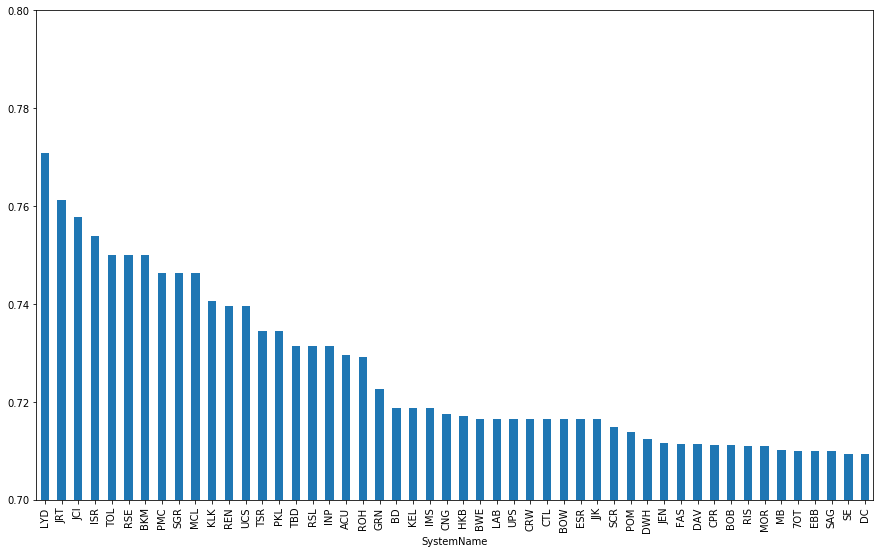

In [140]:
## Add column with 1 if result is correct
games_df = games_df.drop(labels=['TeamIDW','TeamIDL'],axis=1)
games_df['prediction'] = (games_df.OrdinalRankW<games_df.OrdinalRankL).astype(int)
results_by_system = games_df.groupby('SystemName').agg({'prediction':('mean','count')})
results_by_system['prediction']['mean'].sort_values(ascending=False)[:50].plot.bar(ylim=[.7,.8])

In [122]:
results_by_system['prediction'].sort_values('count',ascending=False)[:50]

,mean,count
SystemName,,
POM,0.713740,1048
RTH,0.705153,1048
WOL,0.708969,1048
WLK,0.706107,1048
MOR,0.710878,1048
COL,0.701336,1048
SAG,0.709924,1048
DOL,0.706107,1048
RPI,0.696565,1048


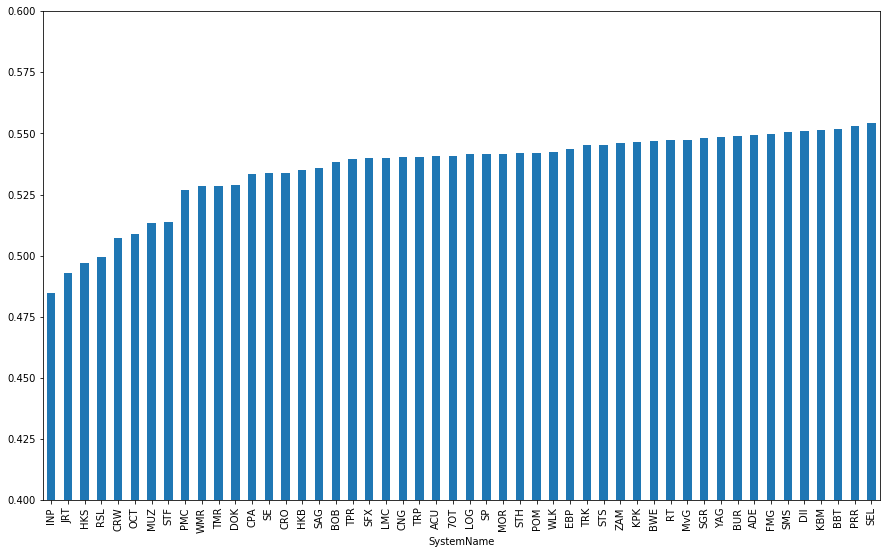

In [101]:
games_df['Wrating'] = 100-4*np.log(games_df['OrdinalRankW']+1)-games_df['OrdinalRankW']/22
games_df['Lrating'] = 100-4*np.log(games_df['OrdinalRankL']+1)-games_df['OrdinalRankL']/22
games_df['prob'] = 1/(1+10**((games_df['Lrating']-games_df['Wrating'])/15))
loss_results = games_df[games_df.Season>=2015].groupby('SystemName')['prob'].agg([('loss',lambda p: -np.mean(np.log(p))),('count','count')])
loss_results['loss'].sort_values()[:50].plot.bar(ylim=[.4,.6])

In [121]:
loss_results['loss'].sort_values()[:50]

SystemName
INP    0.484861
JRT    0.492838
HKS    0.497222
RSL    0.499612
CRW    0.507266
OCT    0.508974
MUZ    0.513390
STF    0.513880
PMC    0.527099
WMR    0.528523
TMR    0.528690
DOK    0.529009
CPA    0.533365
SE     0.533701
CRO    0.533908
HKB    0.535006
SAG    0.535997
BOB    0.538458
TPR    0.539424
SFX    0.540024
LMC    0.540027
CNG    0.540546
TRP    0.540594
ACU    0.540691
7OT    0.540786
LOG    0.541432
SP     0.541549
MOR    0.541646
STH    0.541956
POM    0.542019
WLK    0.542619
EBP    0.543691
TRK    0.545168
STS    0.545218
ZAM    0.546137
KPK    0.546594
BWE    0.546972
RT     0.547239
MvG    0.547280
SGR    0.547988
YAG    0.548760
BUR    0.548994
ADE    0.549483
FMG    0.549701
SMS    0.550696
DII    0.551114
KBM    0.551249
BBT    0.551783
PRR    0.552906
SEL    0.554257
Name: loss, dtype: float64

### POM Ordinals

In [102]:
ref_system = 'POM'
ordinals_df['Rating']= 100-4*np.log(ordinals_df['OrdinalRank']+1)-ordinals_df['OrdinalRank']/22
ordinals_df = ordinals_df[ordinals_df.SystemName==ref_system]
# Get submission file
submission_df = pd.read_csv('Data/SampleSubmissionStage1.csv')

submission_df['Season'] = submission_df['ID'].map(lambda x: int(x.split('_')[0]))
submission_df['Team1'] = submission_df['ID'].map(lambda x: int(x.split('_')[1]))
submission_df['Team2'] = submission_df['ID'].map(lambda x: int(x.split('_')[2]))
submission_df = submission_df.merge(ordinals_df[['Season','TeamID','Rating']],how='left',
                                    left_on = ['Season','Team1'], right_on = ['Season','TeamID'])
submission_df = submission_df.merge(ordinals_df[['Season','TeamID','Rating']],how='left',
                                    left_on = ['Season','Team2'], right_on = ['Season','TeamID'],
                                   suffixes=['W','L'])
submission_df['Pred'] = 1/(1+10**((submission_df['RatingL']-submission_df['RatingW'])/15))
submission_df[['ID', 'Pred']].to_csv('Data/submission2.csv', index=False)
submission_df[['ID', 'Pred']].head()

,ID,Pred
0,2014_1107_1110,0.284009
1,2014_1107_1112,0.018268
2,2014_1107_1113,0.152930
3,2014_1107_1124,0.111807
4,2014_1107_1140,0.147808


In [103]:
submission_df

,ID,Pred,Season,Team1,Team2,TeamIDW,RatingW,TeamIDL,RatingL
0,2014_1107_1110,0.284009,2014,1107,1110,1107,71.227411,1110,77.251039
1,2014_1107_1112,0.018268,2014,1107,1112,1107,71.227411,1112,97.181957
2,2014_1107_1113,0.152930,2014,1107,1113,1107,71.227411,1113,82.378832
3,2014_1107_1124,0.111807,2014,1107,1124,1107,71.227411,1124,84.727965
4,2014_1107_1140,0.147808,2014,1107,1140,1107,71.227411,1140,82.639980
...,...,...,...,...,...,...,...,...,...
11385,2018_1452_1460,0.904417,2018,1452,1460,1452,88.852862,1460,74.213017
11386,2018_1452_1462,0.512333,2018,1452,1462,1452,88.852862,1462,88.531436
11387,2018_1455_1460,0.875391,2018,1455,1460,1455,86.912819,1460,74.213017
11388,2018_1455_1462,0.438201,2018,1455,1462,1455,86.912819,1462,88.531436


In [104]:
pom_ordinals_df = ordinals_df

In [105]:
pom_ordinals_df = pom_ordinals_df[['Season', 'TeamID', 'Rating']]
pom_ordinals_df.columns = ['Season', 'TeamID', 'POM_Rating']

### SAG Ordinals

In [106]:
ordinals_df = pd.read_csv('Data/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv')\
                .rename(columns={'RankingDayNum':'DayNum'})
# Get the last available data from each system previous to the tournament
ordinals_df = ordinals_df.groupby(['SystemName','Season','TeamID']).last().reset_index()

ref_system = 'SAG'
ordinals_df['Rating']= 100-4*np.log(ordinals_df['OrdinalRank']+1)-ordinals_df['OrdinalRank']/22
sag_ordinals_df = ordinals_df[ordinals_df.SystemName==ref_system]

In [107]:
sag_ordinals_df = sag_ordinals_df[['Season', 'TeamID', 'Rating']]
sag_ordinals_df.columns = ['Season', 'TeamID', 'SAG_Rating']

### MOR Ordinals

In [108]:
ordinals_df = pd.read_csv('Data/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv')\
                .rename(columns={'RankingDayNum':'DayNum'})
# Get the last available data from each system previous to the tournament
ordinals_df = ordinals_df.groupby(['SystemName','Season','TeamID']).last().reset_index()

ref_system = 'MOR'
ordinals_df['Rating']= 100-4*np.log(ordinals_df['OrdinalRank']+1)-ordinals_df['OrdinalRank']/22
mor_ordinals_df = ordinals_df[ordinals_df.SystemName==ref_system]

In [109]:
mor_ordinals_df = mor_ordinals_df[['Season', 'TeamID', 'Rating']]
mor_ordinals_df.columns = ['Season', 'TeamID', 'MOR_Rating']

### WLK Ordinals

In [110]:
ordinals_df = pd.read_csv('Data/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv')\
                .rename(columns={'RankingDayNum':'DayNum'})
# Get the last available data from each system previous to the tournament
ordinals_df = ordinals_df.groupby(['SystemName','Season','TeamID']).last().reset_index()

ref_system = 'WLK'
ordinals_df['Rating']= 100-4*np.log(ordinals_df['OrdinalRank']+1)-ordinals_df['OrdinalRank']/22
wlk_ordinals_df = ordinals_df[ordinals_df.SystemName==ref_system]

In [111]:
wlk_ordinals_df = wlk_ordinals_df[['Season', 'TeamID', 'Rating']]
wlk_ordinals_df.columns = ['Season', 'TeamID', 'WLK_Rating']

In [116]:
mor_ordinals_df

,Season,TeamID,MOR_Rating
153677,2003,1102,74.438603
153678,2003,1103,73.915248
153679,2003,1104,85.634834
153680,2003,1105,63.008256
153681,2003,1106,63.888462
...,...,...,...
159505,2019,1462,80.393360
159506,2019,1463,77.424425
159507,2019,1464,64.838789
159508,2019,1465,65.681081


In [114]:
all_ordinals = pd.merge(pom_ordinals_df, sag_ordinals_df, on = ['Season', 'TeamID'], how = 'left')

In [117]:
all_ordinals = pd.merge(all_ordinals, mor_ordinals_df, on = ['Season', 'TeamID'], how = 'left')

In [119]:
all_ordinals = pd.merge(all_ordinals, wlk_ordinals_df, on = ['Season', 'TeamID'], how = 'left')

In [133]:
all_ordinals['massey_avg'] =  (all_ordinals['POM_Rating'] + all_ordinals['SAG_Rating'] + all_ordinals['MOR_Rating'] + all_ordinals['WLK_Rating']) / 4

In [134]:
all_ordinals.head()

,Season,TeamID,POM_Rating,SAG_Rating,MOR_Rating,WLK_Rating,massey_avg
0,2003,1102,72.401655,73.184732,74.438603,72.052049,73.019260
1,2003,1103,72.191443,71.568652,73.915248,71.568652,72.310999
2,2003,1104,84.394558,83.767837,85.634834,83.919965,84.429299
3,2003,1105,63.125055,62.833369,63.008256,62.949919,62.979150
4,2003,1106,65.741658,65.439336,63.888462,66.289491,65.339737


In [135]:
all_ordinals.to_csv("Data/massey_df.csv", index = None)